In [1]:
import pandas as pd

df = pd.read_csv("tanzania_expenditures.csv")

In [2]:
!pip install -r requirements.txt

  Using cached cfedemands-0.6.4.dev0-py2.py3-none-any.whl.metadata (1.6 kB)
Using cached cfedemands-0.6.4.dev0-py2.py3-none-any.whl (45 kB)
  Attempting uninstall: CFEDemands
    Found existing installation: CFEDemands 0.6.1
    Uninstalling CFEDemands-0.6.1:
      Successfully uninstalled CFEDemands-0.6.1


In [4]:
import pandas as pd

df = pd.read_csv("tanzania_expenditures.csv")

# Drop any non-numeric ID columns if needed (e.g., 'household_id')
food_only = df.select_dtypes(include='number')

# Compute total food expenditure per household
df["total_expenditure"] = food_only.sum(axis=1)

# Get median household food budget
median_budget = df["total_expenditure"].median()
print(f"Median food expenditure: {median_budget}")

Median food expenditure: 205250.0


In [7]:
import pandas as pd

# Load the data
df = pd.read_csv("tanzania_expenditures.csv", index_col=0, header=None)

# Transpose so food items are columns, values are in one row
df = df.T
df.columns.name = None
df.reset_index(drop=True, inplace=True)

# Convert all values to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Preview
print("Food categories:", list(df.columns))
df.head()

Food categories: ['Vegetables (fresh)', 'Maize (flour)', 'Rice (husked)', 'Sugar', 'Fish (fresh)', 'Cooking Oil', 'Pulses', 'Beef', 'Other Fruits', 'Plantains', 'Chicken', 'Coconuts', 'Milk (fresh)', 'Goat Meat', 'Leafy Greens', 'Bread', 'Buns, Cakes And Biscuits', 'Fish (dried)', 'Cassava Fresh', 'Ripe Bananas', 'Sweet Potatoes', 'Groundnuts', 'Irish Potatoes', 'Wheat Flour', 'Soft drinks', 'Citrus Fruits', 'Eggs', 'Dairy Products', 'Cassava Dry/Flour', 'Millet & Sorghum (flour)', 'Maize (grain)', 'Pork', 'Honey, Syrups, etc.', 'Maize (green, cob)', 'Yams/Cocoyams', 'Macaroni, Spaghetti', 'Salt', 'Bottled Beer', 'Tea (dry)', 'Vegetables (preserved)', 'Sugarcane', 'Butter, Etc.', 'Other Spices', 'Milk (dry or canned)', 'Local Brews', 'Sweets', 'Nuts', 'Coffee & Cocoa', 'Millet & Sorghum (grain)', 'Wine & Spirits', 'Other Cereal Products', 'Wild Birds & Insects', 'Seeds', 'Prepared Tea, Coffee']


,Vegetables (fresh),Maize (flour),Rice (husked),Sugar,Fish (fresh),Cooking Oil,Pulses,Beef,Other Fruits,Plantains,...,Local Brews,Sweets,Nuts,Coffee & Cocoa,Millet & Sorghum (grain),Wine & Spirits,Other Cereal Products,Wild Birds & Insects,Seeds,"Prepared Tea, Coffee"
0,3869642.52,2594400.0,2307662.159,1385162.0,1312329.643,1255947.5,1000286.0,971833.3333,786935.9344,775278.7082,...,34600.0,33134.72222,30571.42857,12837.86161,12350.0,11166.66667,8400.0,2000.0,1500.0,100.0


In [8]:
# Total food expenditure
total_budget = df.sum(axis=1).values[0]

# Share of budget by food item
shares = df.iloc[0] / total_budget

# Show top 5 items
shares.sort_values(ascending=False).head()

Vegetables (fresh)    0.154953
Maize (flour)         0.103888
Rice (husked)         0.092406
Sugar                 0.055466
Fish (fresh)          0.052550
Name: 0, dtype: float64

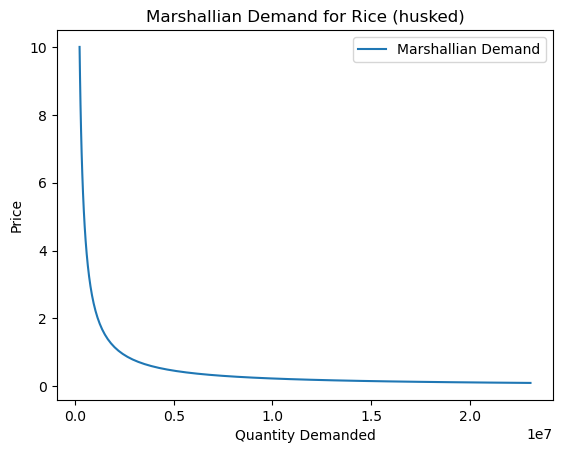

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

item = 'Rice (husked)'
item_share = shares[item]
budget = total_budget

# Base quantity = budget share / base price (assume base price = 1)
base_price = 1
q0 = item_share * budget / base_price

# Simulate price changes
P = np.geomspace(0.1, 10, 50) * base_price
marshallian = [item_share * budget / p for p in P]

plt.plot(marshallian, P, label="Marshallian Demand")
plt.xlabel("Quantity Demanded")
plt.ylabel("Price")
plt.title(f"Marshallian Demand for {item}")
plt.legend()

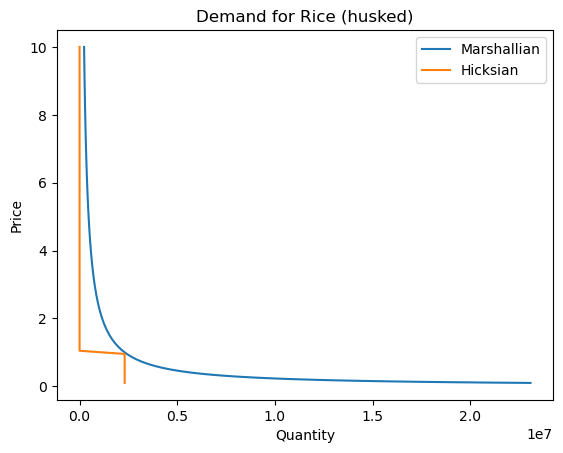

In [10]:
# Assume base utility = q0 * log(p)
def utility(q, p): return q * np.log(p)

U0 = utility(q0, base_price)
hicksian = [U0 / np.log(p) if p > 1 else q0 for p in P]

plt.plot(marshallian, P, label="Marshallian")
plt.plot(hicksian, P, label="Hicksian")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.title(f"Demand for {item}")
plt.legend()

In [11]:
def compensating_variation(p0, p1, q0):
    return q0 * (p1 - p0)

def revenue(p0, p1, q1):
    return (p1 - p0) * q1

def deadweight_loss(cv, rev):
    return cv - rev

# Simulate price doubling
p1 = 2 * base_price
q1 = item_share * budget / p1

cv = compensating_variation(base_price, p1, q0)
rev = revenue(base_price, p1, q1)
dwl = deadweight_loss(cv, rev)

print(f"Compensating Variation: {cv:,.2f} TSh")
print(f"Revenue: {rev:,.2f} TSh")
print(f"Deadweight Loss: {dwl:,.2f} TSh")

Compensating Variation: 2,307,662.16 TSh
Revenue: 1,153,831.08 TSh
Deadweight Loss: 1,153,831.08 TSh
